# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [5]:
chipo = pd.read_csv('chiplot.tsv',sep='\t')

### Step 4. See the first 10 entries

In [6]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

<AxesSubplot:>

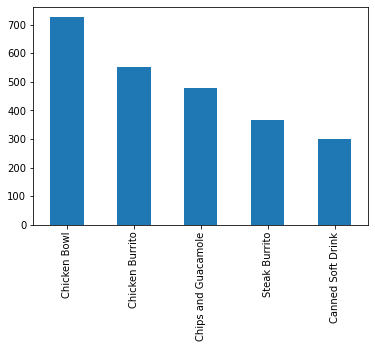

In [9]:
chipo.item_name.value_counts().head().plot.bar()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [9]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [16]:
chipo.item_price = chipo.item_price.apply(lambda x:float(x[1:]))

In [17]:
price_cnt=chipo.groupby('item_price')

In [18]:
quantity_sum=price_cnt.quantity.sum()

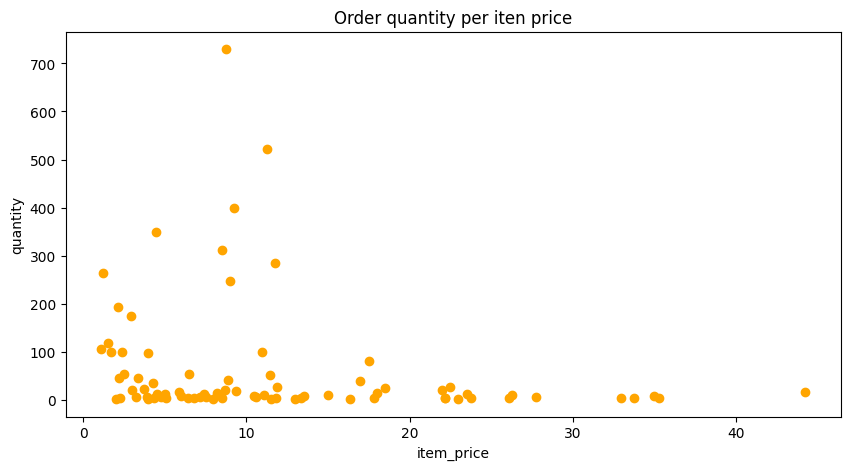

In [22]:
plt.figure(figsize=(10,5))
plt.title("Order quantity per iten price")
plt.xlabel("item_price")
plt.ylabel("quantity")
plt.xticks()
plt.scatter(price_cnt.indices.keys(),quantity_sum,c="orange")


### Step 7. BONUS: Create a question and a graph to answer your own question.

######  Plot Revenue from each item 

In [23]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [30]:
chipo["revenue"]=chipo.quantity * chipo.item_price


In [31]:
lable_r=chipo.groupby('item_name').revenue.sum()

In [32]:
lable_r


item_name
6 Pack Soft Drink                         369.93
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     138.71
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             649.18
Bowl                                       74.00
Burrito                                    44.40
Canned Soda                               191.84
Canned Soft Drink                         603.75
Carnitas Bowl                             830.71
Carnitas Burrito                          616.33
Carnitas Crispy Tacos                      95.94
Carnitas Salad                              8.99
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             8044.63
Chicken Burrito                          6387.06
Chicken Crispy Tacos                      524.11
Chicken Sa

In [39]:
rev_df = lable_r.to_frame().reset_index()


In [42]:
rev_df.item_name

0                         6 Pack Soft Drink
1                             Barbacoa Bowl
2                          Barbacoa Burrito
3                     Barbacoa Crispy Tacos
4                       Barbacoa Salad Bowl
5                       Barbacoa Soft Tacos
6                             Bottled Water
7                                      Bowl
8                                   Burrito
9                               Canned Soda
10                        Canned Soft Drink
11                            Carnitas Bowl
12                         Carnitas Burrito
13                    Carnitas Crispy Tacos
14                           Carnitas Salad
15                      Carnitas Salad Bowl
16                      Carnitas Soft Tacos
17                             Chicken Bowl
18                          Chicken Burrito
19                     Chicken Crispy Tacos
20                            Chicken Salad
21                       Chicken Salad Bowl
22                       Chicken

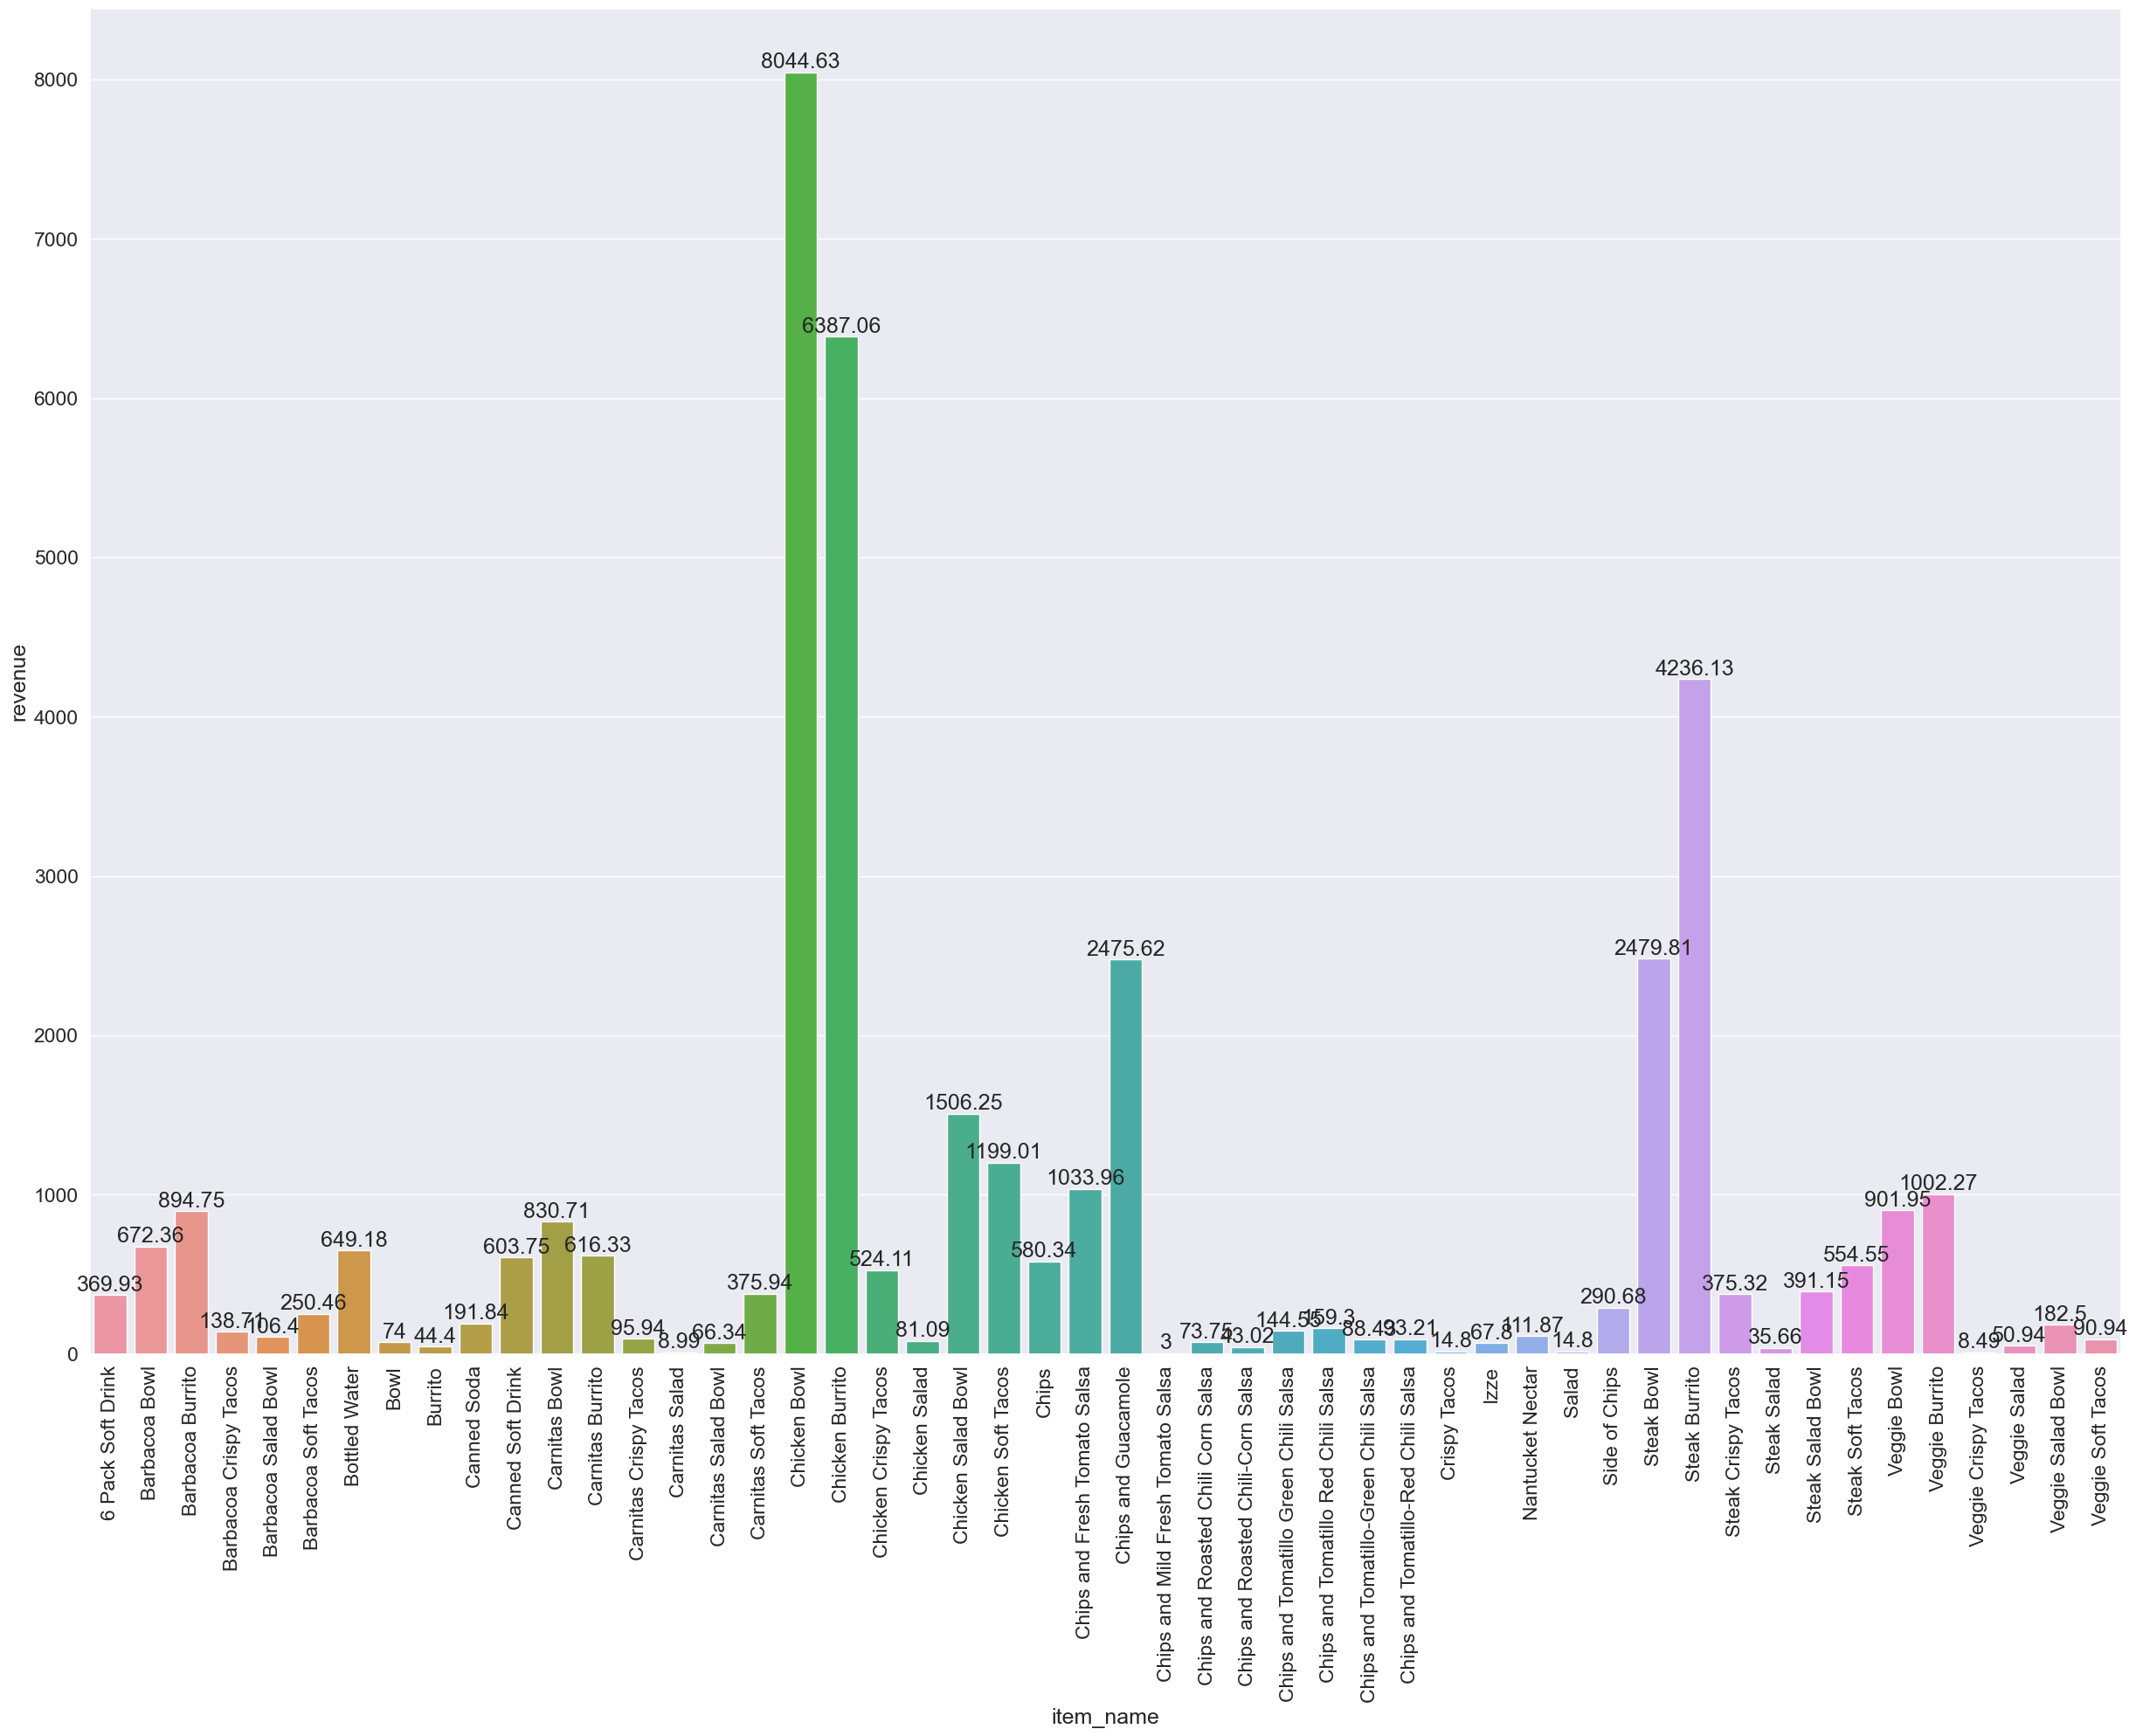

In [68]:
plt.figure(figsize=(30,20))
ax = sns.barplot(x='item_name',y='revenue',data=rev_df)
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(
labels=rev_df.item_name, rotation=90)
sns.set(font_scale=1.5)

